In [1]:
import numpy as np
import pandas as pd
import os 
import glob 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import scipy
import csv

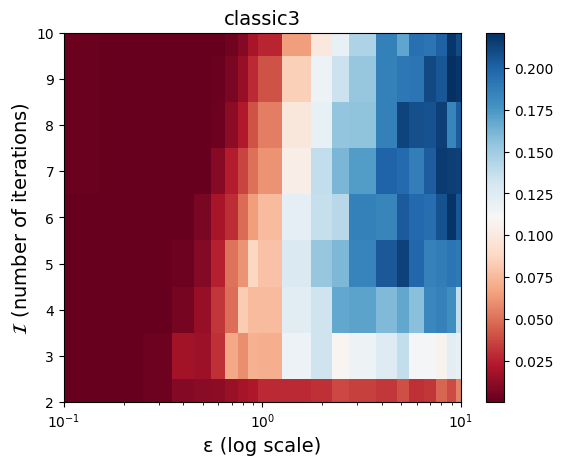

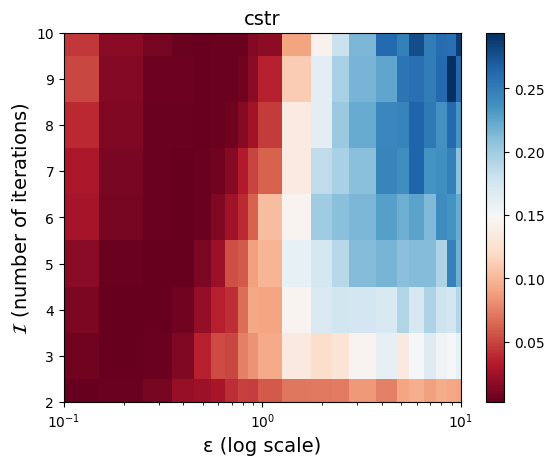

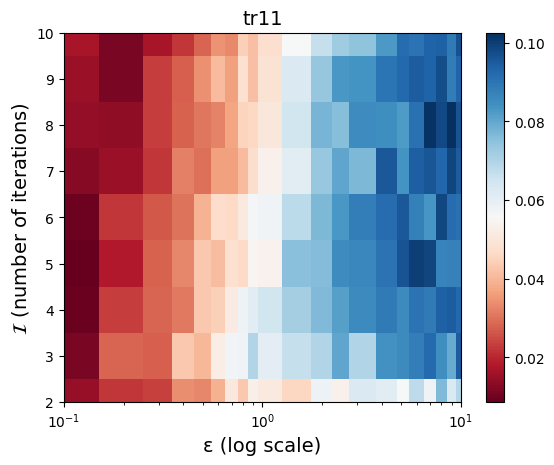

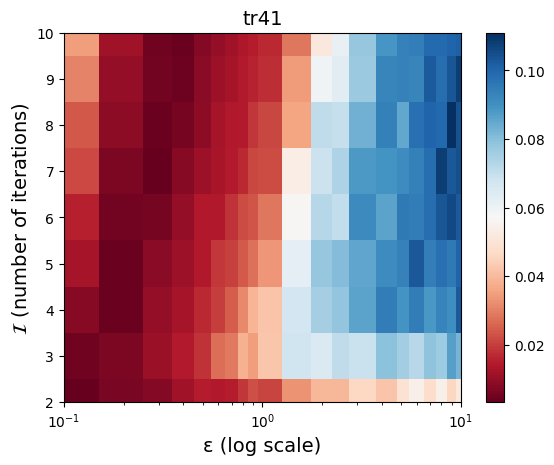

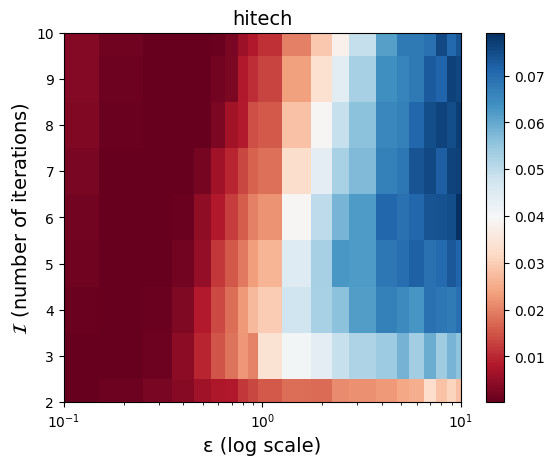

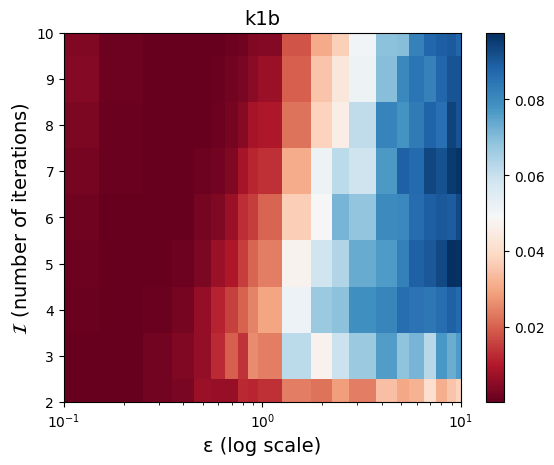

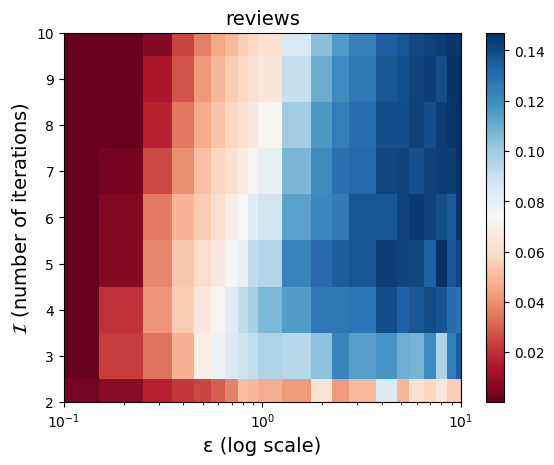

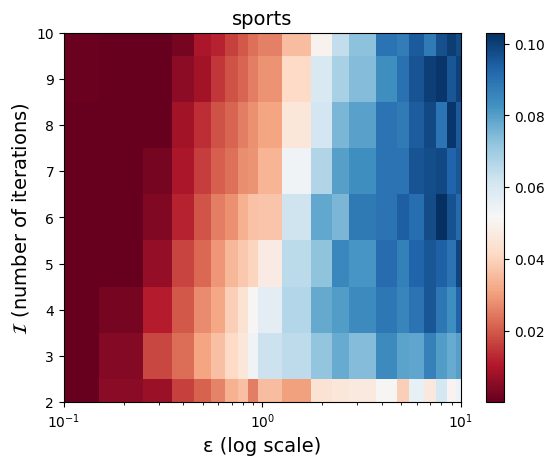

In [3]:
datasets = ['classic3', 'cstr', 'tr11', 'tr41', 'hitech', 'k1b', 'reviews', 'sports']
iter_list = np.array([2,3,4,5,6,7,8,9,10])
eps_list = np.array([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.5,2,2.5,3,4.5,5,6,7,8,9,10])

for dataset in datasets:
    dptaucc_nmi_x = []
    dptaucc_nmi_y = []
    for n_iterations in iter_list:
        path = os.getcwd()
        path=os.path.join(path,"output/dptaucc")
        f1=os.path.join(path,  f"{dataset}_{n_iterations}_results.csv")
        data_cc = pd.read_csv(f1)
        data_cc_means = data_cc.groupby(['model'], as_index=False).mean()
        data_cc_std = data_cc.groupby(['model'], as_index=False).std()
        dptaucc_nmi_x.append(data_cc_means['tau_x'])
        dptaucc_nmi_y.append(data_cc_means['tau_y'])

    nmi_x = np.array(dptaucc_nmi_x)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(eps_list, iter_list, nmi_x, cmap='RdBu', vmin=nmi_x.min(), vmax=nmi_x.max())
    ax.set_title(dataset, fontsize=14)
    ax.axis([ eps_list.min(), eps_list.max(), iter_list.min(), iter_list.max()])
    plt.xscale('log')
    fig.colorbar(c, ax=ax)
    plt.xlabel('\u03b5 (log scale)', fontsize=14)
    plt.ylabel(r'$\mathcal{I}$ (number of iterations)', fontsize=14)
    plt.show()